<a href="https://colab.research.google.com/github/adii2512/BML-Practical-s-/blob/main/Experiment_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from google.colab import files

In [2]:
sns.set(style="whitegrid")

In [3]:
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
X = df.iloc[:, [3, 4]].values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

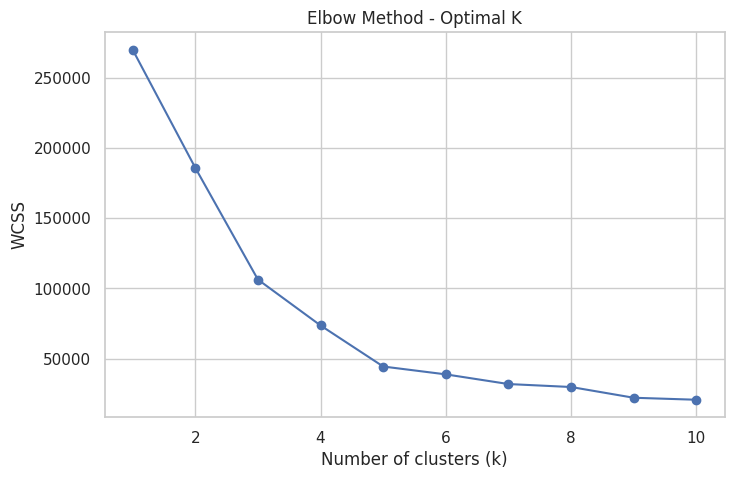

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method - Optimal K")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.show()


In [9]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_pred = kmeans.fit_predict(X)

df['Cluster'] = y_pred
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


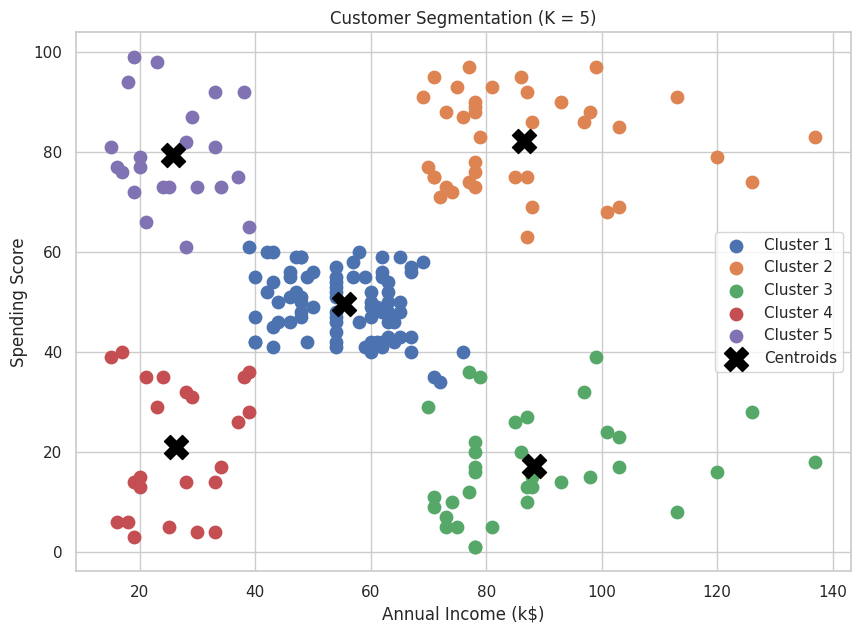

In [10]:
plt.figure(figsize=(10,7))

plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s=80, label='Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s=80, label='Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s=80, label='Cluster 3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s=80, label='Cluster 4')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s=80, label='Cluster 5')

# Plot centroids
plt.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    s=300,
    c='black',
    marker='X',
    label='Centroids'
)

plt.title("Customer Segmentation (K = 5)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.legend()
plt.show()


In [11]:
df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636
